In [58]:
import math as m
import random as r
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Activation, Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
import numpy as np
import pandas as pd

In [59]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
y_train = tf.one_hot(y_train,10)
y_test = tf.one_hot(y_test,10)

y_train = np.reshape(y_train, (y_train.shape[0],y_train.shape[2]))
y_test = np.reshape(y_test, (y_test.shape[0],y_test.shape[2]))

X_train = X_train / 255
X_test = X_test / 255

In [60]:
def modelo(dropout=0.1, lr=0.005):
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(10, activation='softmax'))

    adam = keras.optimizers.Adam(learning_rate=lr)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model

model = modelo()

In [61]:
def train_test_model(dropout, lr, X_train, y_train, X_test, y_test, optimal_score):
    print("Training for: dropout = " + str(dropout) + ", lr = " + str(lr))
    model = modelo(dropout, lr)
    model.fit(X_train, y_train, batch_size = 100, epochs = 5, verbose = 1)
    new_score = model.evaluate(X_test, y_test)[1]
    print("Score = " + str(new_score))
    print("---------------------")
    if new_score > optimal_score:
        model.save('Optimal_Model.h5')
    return new_score
    

In [62]:
class Particle:
    def __init__(self, x, y, v_x, v_y, min_X, max_X, min_Y, max_Y, func):
        self.x = x
        self.y = y
        self.v_x = v_x
        self.v_y = v_y
        self.func = func
        self.score = func(x,y, X_train, y_train, X_test, y_test, optimal_score=0)
        self.best_score = self.score
        self.best_x = x
        self.best_y = y
        self.min_X = min_X
        self.max_X = max_X
        self.min_Y = min_Y
        self.max_Y = max_Y

    def update(self, new_v_x, new_v_y, optimal_score):
        new_x = self.x + new_v_x
        new_y = self.y + new_v_y
        self.v_x = new_v_x
        self.v_y = new_v_y
        
        if (new_x > self.max_X):
            self.x = self.max_X
        elif (new_x < self.min_X):
            self.x = self.min_X
        else:
            self.x = new_x

        if (new_y > self.max_Y):
            self.y = self.max_Y
        elif (new_y < self.min_Y):
            self.y = self.min_Y
        else:
            self.y = new_y
        
        self.score = self.func(self.x, self.y, X_train, y_train, X_test, y_test, optimal_score)
        if (self.score > self.best_score):
            self.best_score = self.score
            self.best_x = self.x
            self.best_y = self.y

        

In [63]:
def plot_particles(particles, min_X, max_X, min_Y, max_Y):
    particles_x = []
    particles_y = []

    for particle in particles:
        particles_x.append(particle.x)
        particles_y.append(particle.y)

    plt.xlim(left=min_X-0.1, right=max_X+0.1)
    plt.ylim(bottom=min_Y-0.001, top=max_Y+0.001)
    plt.scatter(particles_x, particles_y, color="blue", alpha=0.3)

    plt.show()

Training for: dropout = 0.2629126786714685, lr = 0.004483828655594349
Epoch 1/5
500/500 [==============================] - 53s 95ms/step - loss: 1.7405 - accuracy: 0.3492
Epoch 2/5
500/500 [==============================] - 47s 93ms/step - loss: 1.3715 - accuracy: 0.50380s - loss: 1.3716 - accuracy: 0.
Epoch 3/5
500/500 [==============================] - 47s 94ms/step - loss: 1.2591 - accuracy: 0.5495
Epoch 4/5
500/500 [==============================] - 46s 93ms/step - loss: 1.1921 - accuracy: 0.5761
Epoch 5/5
313/313 [==============================] - 4s 12ms/step - loss: 1.2087 - accuracy: 0.5685
Score = 0.5684999823570251
---------------------
Training for: dropout = 0.27278801157910176, lr = 0.006644813284106212
Epoch 1/5
500/500 [==============================] - 47s 93ms/step - loss: 1.8701 - accuracy: 0.2987
Epoch 2/5
500/500 [==============================] - 45s 90ms/step - loss: 1.5759 - accuracy: 0.4217
Epoch 3/5
500/500 [==============================] - 46s 91ms/step - los

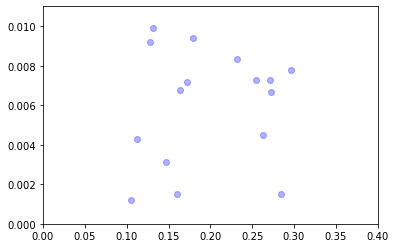

Training for: dropout = 0.1733618511490962, lr = 0.0027978504023833924
Epoch 1/5
500/500 [==============================] - 51s 99ms/step - loss: 1.6685 - accuracy: 0.3851
Epoch 2/5
500/500 [==============================] - 49s 97ms/step - loss: 1.3092 - accuracy: 0.5312
Epoch 3/5
500/500 [==============================] - 49s 98ms/step - loss: 1.1793 - accuracy: 0.5798
Epoch 4/5
500/500 [==============================] - 49s 98ms/step - loss: 1.0989 - accuracy: 0.6150
Epoch 5/5
313/313 [==============================] - 4s 12ms/step - loss: 1.0046 - accuracy: 0.6467
Score = 0.6467000246047974
---------------------
Training for: dropout = 0.18003907119032336, lr = 0.006242597069644088
Epoch 1/5
500/500 [==============================] - 51s 100ms/step - loss: 1.7974 - accuracy: 0.3312
Epoch 2/5
500/500 [==============================] - 50s 101ms/step - loss: 1.5308 - accuracy: 0.4375
Epoch 3/5
500/500 [==============================] - 49s 99ms/step - loss: 1.4645 - accuracy: 0.4673


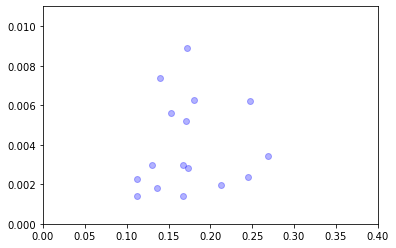

Training for: dropout = 0.11690431347175415, lr = 0.0012618107210889144
Epoch 1/5
500/500 [==============================] - 51s 101ms/step - loss: 1.6439 - accuracy: 0.3933
Epoch 2/5
500/500 [==============================] - 50s 100ms/step - loss: 1.2936 - accuracy: 0.5361
Epoch 3/5
500/500 [==============================] - 50s 100ms/step - loss: 1.1446 - accuracy: 0.5957
Epoch 4/5
500/500 [==============================] - 50s 100ms/step - loss: 1.0431 - accuracy: 0.6323
Epoch 5/5
313/313 [==============================] - 4s 12ms/step - loss: 1.0172 - accuracy: 0.6498
Score = 0.6498000025749207
---------------------
Training for: dropout = 0.11936193189204247, lr = 0.0014230345792580097
Epoch 1/5
500/500 [==============================] - 51s 100ms/step - loss: 1.6440 - accuracy: 0.3935
Epoch 2/5
500/500 [==============================] - 50s 100ms/step - loss: 1.2924 - accuracy: 0.5334
Epoch 3/5
500/500 [==============================] - 53s 106ms/step - loss: 1.1447 - accuracy: 

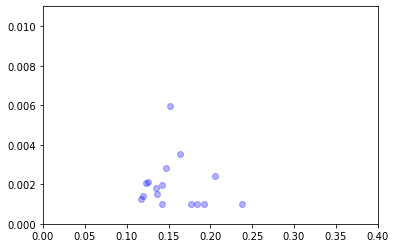

Training for: dropout = 0.1, lr = 0.001337692831687704
Epoch 1/5
500/500 [==============================] - 51s 102ms/step - loss: 1.6224 - accuracy: 0.4030
Epoch 2/5
500/500 [==============================] - 50s 101ms/step - loss: 1.2641 - accuracy: 0.5477
Epoch 3/5
500/500 [==============================] - 51s 101ms/step - loss: 1.0990 - accuracy: 0.6103
Epoch 4/5
500/500 [==============================] - 51s 101ms/step - loss: 0.9883 - accuracy: 0.6523
Epoch 5/5
313/313 [==============================] - 5s 14ms/step - loss: 0.9136 - accuracy: 0.6811
Score = 0.6811000108718872
---------------------
Training for: dropout = 0.1, lr = 0.001
Epoch 1/5
500/500 [==============================] - 50s 100ms/step - loss: 1.7180 - accuracy: 0.3682
Epoch 2/5
500/500 [==============================] - 50s 101ms/step - loss: 1.3507 - accuracy: 0.5159
Epoch 3/5
500/500 [==============================] - 50s 100ms/step - loss: 1.1949 - accuracy: 0.5758
Epoch 4/5
500/500 [=======================

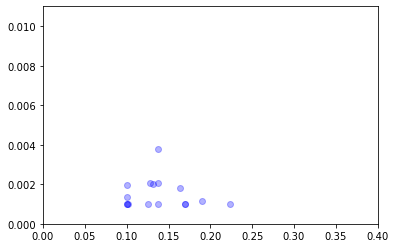

Training for: dropout = 0.1, lr = 0.0017314480463301377
Epoch 1/5
500/500 [==============================] - 52s 102ms/step - loss: 1.6369 - accuracy: 0.3962
Epoch 2/5
500/500 [==============================] - 51s 102ms/step - loss: 1.2562 - accuracy: 0.5506
Epoch 3/5
500/500 [==============================] - 52s 105ms/step - loss: 1.1226 - accuracy: 0.6010
Epoch 4/5
500/500 [==============================] - 53s 106ms/step - loss: 1.0229 - accuracy: 0.6387
Epoch 5/5
313/313 [==============================] - 5s 14ms/step - loss: 0.9926 - accuracy: 0.6530
Score = 0.652999997138977
---------------------
Training for: dropout = 0.10032017107697602, lr = 0.001
Epoch 1/5
500/500 [==============================] - 59s 115ms/step - loss: 1.6562 - accuracy: 0.3860
Epoch 2/5
500/500 [==============================] - 53s 105ms/step - loss: 1.3031 - accuracy: 0.5318
Epoch 3/5
500/500 [==============================] - 51s 101ms/step - loss: 1.1555 - accuracy: 0.5904s - los
Epoch 4/5
500/500 [

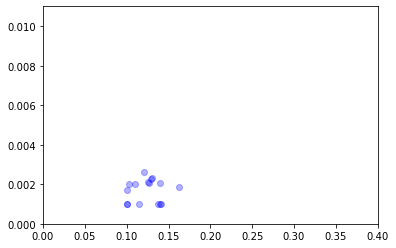

Training for: dropout = 0.11947877959690067, lr = 0.0018880777089355075
Epoch 1/5
500/500 [==============================] - 52s 103ms/step - loss: 1.6946 - accuracy: 0.3751
Epoch 2/5
500/500 [==============================] - 51s 102ms/step - loss: 1.3274 - accuracy: 0.5218
Epoch 3/5
500/500 [==============================] - 51s 101ms/step - loss: 1.1757 - accuracy: 0.5789
Epoch 4/5
500/500 [==============================] - 51s 102ms/step - loss: 1.0857 - accuracy: 0.6134
Epoch 5/5
313/313 [==============================] - 4s 13ms/step - loss: 0.9835 - accuracy: 0.6556
Score = 0.6556000113487244
---------------------
Training for: dropout = 0.12762147962159115, lr = 0.0013334025353042764
Epoch 1/5
500/500 [==============================] - 52s 102ms/step - loss: 1.7062 - accuracy: 0.3685
Epoch 2/5
500/500 [==============================] - 51s 103ms/step - loss: 1.3508 - accuracy: 0.5114
Epoch 3/5
500/500 [==============================] - 51s 103ms/step - loss: 1.1958 - accuracy: 

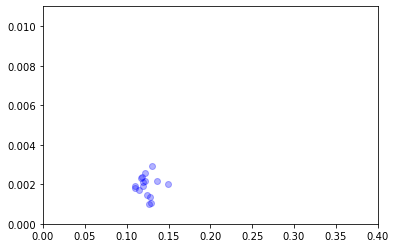

In [64]:
def PSO(num_iterations=5, num_particles=16, w=0.5, c1=1, c2=1, min_X=0.1, max_X=0.3, min_Y=0.001, max_Y=0.01):
    particles = []
    for i in range(num_particles):
        particle = Particle(r.uniform(min_X,max_X), r.uniform(min_Y,max_Y), min_X * r.uniform(-1,1), min_Y * r.uniform(-1,1), min_X, max_X, min_Y, max_Y, train_test_model)
        if i == 0:
            optimal_score = particle.score
            optimal_pos_x = particle.x
            optimal_pos_y = particle.y
        else:
            if (particle.score > optimal_score):
                optimal_score = particle.score
                optimal_pos_x = particle.x
                optimal_pos_y = particle.y
        particles.append(particle)

    plot_particles(particles, min_X, max_X, min_Y, max_Y)
    
    for i in range(num_iterations):
        for particle in particles:
            v_x = w * particle.v_x + c1 * r.random() * (optimal_pos_x - particle.x) + c2 * r.random() * (particle.best_x - particle.x)
            v_y = w * particle.v_y + c1 * r.random() * (optimal_pos_y - particle.y) + c2 * r.random() * (particle.best_y - particle.y)

            particle.update(v_x, v_y, optimal_score)
            
        for particle in particles:
            if particle.score > optimal_score:
                optimal_score = particle.score
                optimal_pos_x = particle.x
                optimal_pos_y = particle.y

        plot_particles(particles, min_X, max_X, min_Y, max_Y)

    
    optimal_model = keras.models.load_model('Optimal_Model.h5')
    return (optimal_model, optimal_score, optimal_pos_x, optimal_pos_y)


model, score, dropout, lr = PSO()


In [65]:
print("Score: "  + str(score))
print("Dropout: " + str(dropout))
print("Learning Rate: " + str(lr))

Score: 0.6894000172615051
Dropout: 0.12517120707378143
Learning Rate: 0.0021070057781352124


In [66]:
def print_class(predictions):
    prediction = np.argmax(predictions)
    if prediction == 0:
        print('Clase: Airplane')
    if prediction == 1:
        print('Clase: Automobile')
    if prediction == 2:
        print('Clase: Bird')
    if prediction == 3:
        print('Clase: Cat')
    if prediction == 4:
        print('Clase: Deer')
    if prediction == 5:
        print('Clase: Dog')
    if prediction == 6:
        print('Clase: Frog')
    if prediction == 7:
        print('Clase: Horse')
    if prediction == 8:
        print('Clase: Ship')
    if prediction == 9:
        print('Clase: Truck')
    
    print("Score = " + str(predictions[prediction] * 100))
 
 

Populating the interactive namespace from numpy and matplotlib


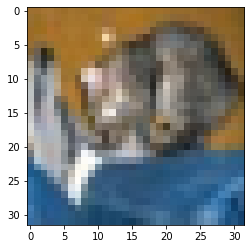

Clase: Cat
Score = 77.0819365978241


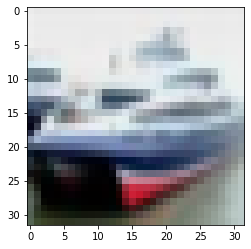

Clase: Ship
Score = 71.65801525115967


In [67]:
%pylab inline
import matplotlib.pyplot as plt
from PIL import Image

predictions = model.predict(X_test)
imgplot = plt.imshow(X_test[0])
plt.show()
print_class(predictions[0])
imgplot = plt.imshow(X_test[1])
plt.show()
print_class(predictions[1])